<a href="https://colab.research.google.com/github/pawel0508/MachineLearning_UcznieNienadzorowane/blob/main/LOF_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

sns.set(font_scale = 1.2)
np.random.seed(10)

In [3]:
data = make_blobs(n_samples = 300, cluster_std = 2.0, random_state = 10)[0]
data[:5]

array([[  4.64616033,   5.03253239],
       [  1.81963552,  -5.03357756],
       [  0.89059085,   3.41070216],
       [  0.61174827,   2.26068253],
       [  6.01229431, -10.52657552]])

In [4]:
tmp = pd.DataFrame(data = data, columns = ['x1', 'x2'])
tmp.head()

,x1,x2
0,4.646160,5.032532
1,1.819636,-5.033578
2,0.890591,3.410702
3,0.611748,2.260683
4,6.012294,-10.526576


In [5]:
px.scatter(tmp, x='x1', y='x2', width=950, title='Local Outlier Factor', template='simple_white')

In [12]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x = 'x1', y = 'x2', width = 700,
                          title = 'Outliers', nbinsx = 20, nbinsy = 20)
fig2 = px.scatter(tmp, x = 'x1', y = 'x2', width=700, title='Outliers', opacity=0.5)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_traces(marker=dict(size=4, line=dict(width=2, color='white')), selector=dict(mode='markers'))
fig.update_layout(template='simple_white', width=950)
fig.show()

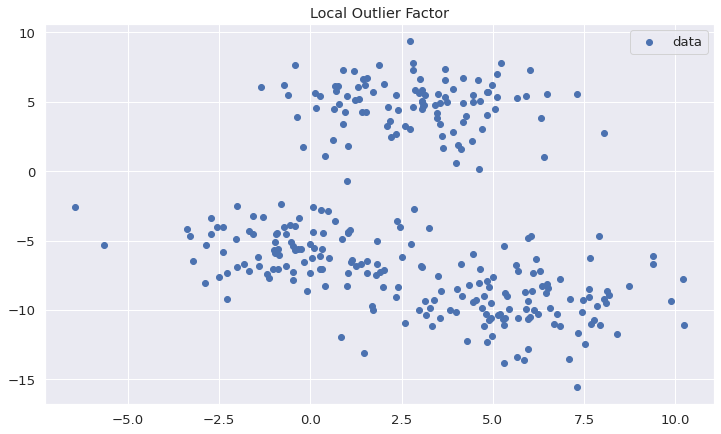

In [14]:
plt.figure(figsize=(12, 7))
plt.scatter(data[:, 0], data[:, 1], label='data', cmap='tab10')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [17]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 20)

y_pred = lof.fit_predict(data)
y_pred[:50]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
all_data = np.c_[data, y_pred]

In [19]:
all_data

array([[ 4.64616033e+00,  5.03253239e+00,  1.00000000e+00],
       [ 1.81963552e+00, -5.03357756e+00,  1.00000000e+00],
       [ 8.90590854e-01,  3.41070216e+00,  1.00000000e+00],
       [ 6.11748273e-01,  2.26068253e+00,  1.00000000e+00],
       [ 6.01229431e+00, -1.05265755e+01,  1.00000000e+00],
       [ 8.73984611e+00, -8.24918180e+00,  1.00000000e+00],
       [ 1.81278111e+00, -6.64984153e+00,  1.00000000e+00],
       [ 9.57919668e-01,  4.24752148e+00,  1.00000000e+00],
       [-2.72454270e+00, -3.38501044e+00,  1.00000000e+00],
       [ 2.81953072e+00,  7.32354248e+00,  1.00000000e+00],
       [ 1.44435501e+00,  6.65024120e+00,  1.00000000e+00],
       [ 7.93935739e+00, -1.10489000e+01,  1.00000000e+00],
       [-7.10971159e-01,  6.20897950e+00,  1.00000000e+00],
       [-2.86136618e+00, -5.31465047e+00,  1.00000000e+00],
       [ 4.87523710e+00,  5.72032274e+00,  1.00000000e+00],
       [ 5.32875184e+00, -8.79827858e+00,  1.00000000e+00],
       [ 1.32891783e+00,  5.18770182e+00

In [20]:
tmp['y_pred'] = y_pred
px.scatter(tmp, x='x1', y='x2', color='y_pred', width=950, 
           title='Local Outlier Factor', template='simple_white')

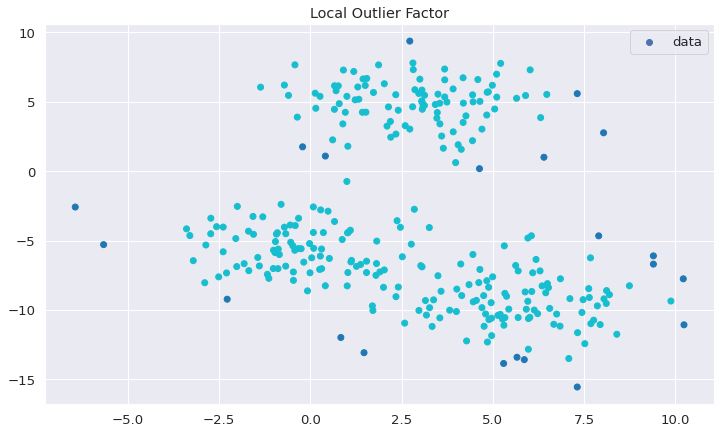

In [21]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [23]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max()-LOF_scores)/(LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.03834082, 0.12830657, 0.1180624 , 0.24543848, 0.01556816])

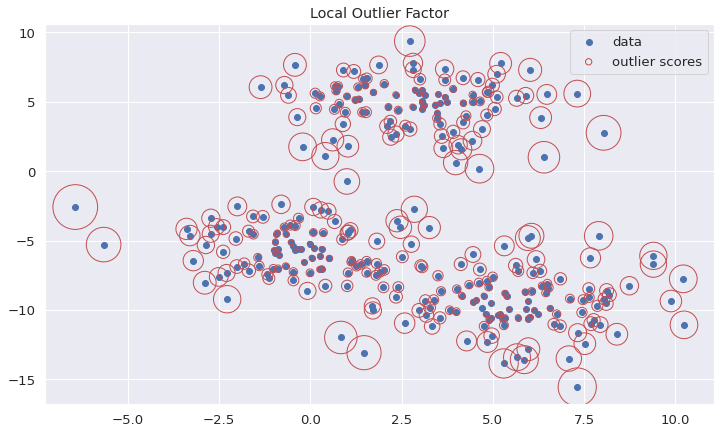

In [24]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], label='data', cmap='tab10')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()

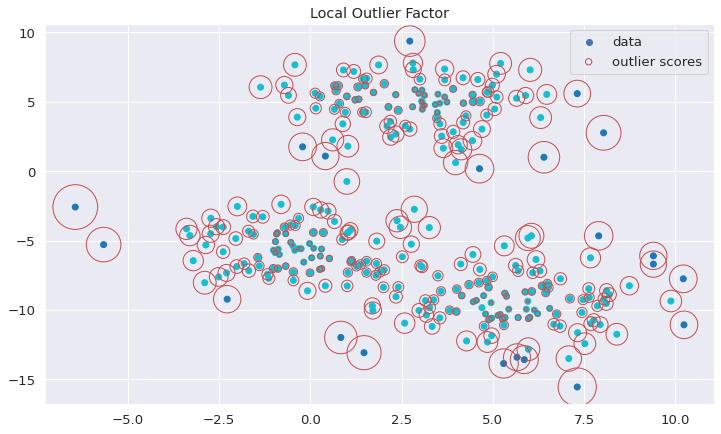

In [25]:

plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()